<a href="https://colab.research.google.com/github/djdunc/housemill/blob/master/data/minutes-under-water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

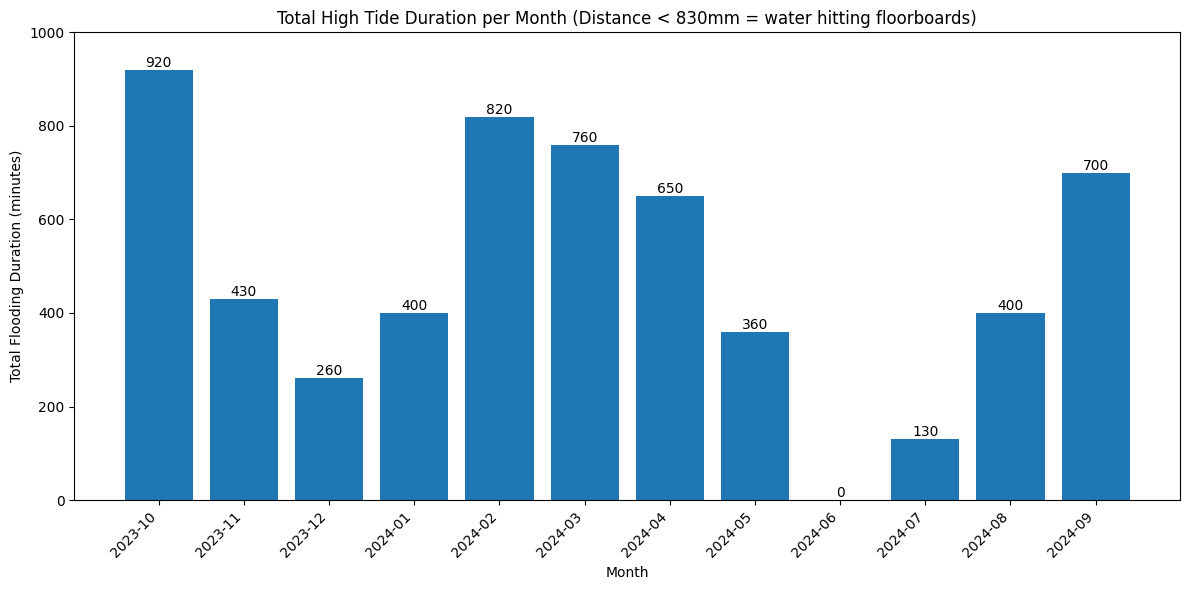

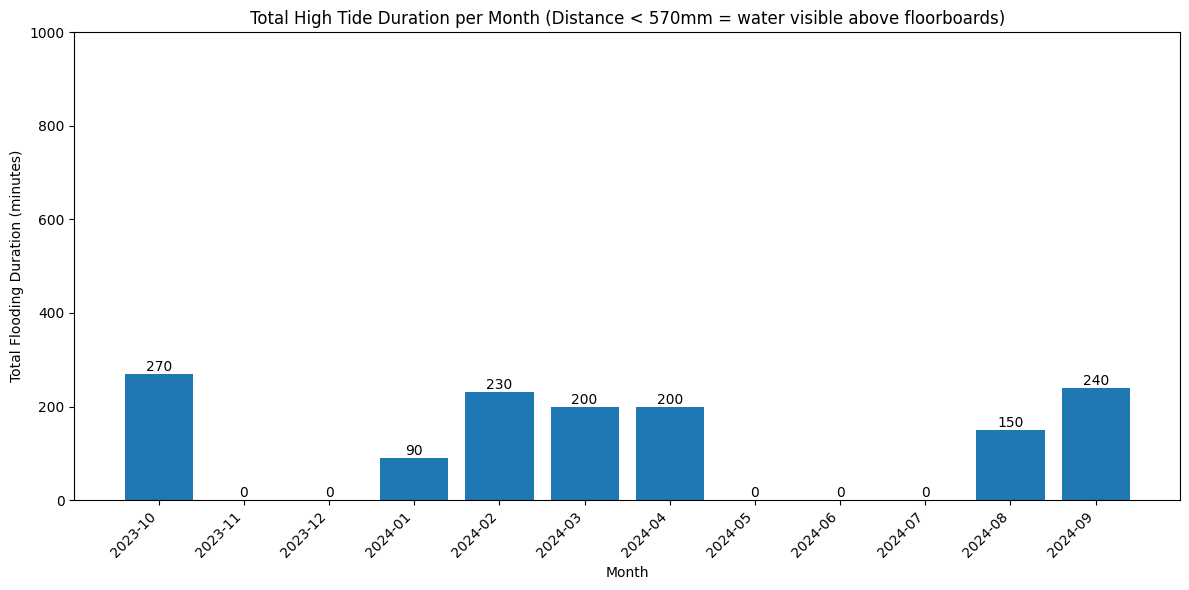

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar  # For month name abbreviations

df = pd.read_csv('/content/Maxbotix-Sonar-height-data-2023_10-2024-09.csv')

def calculate_high_tide_duration(df, time_column, data_column, threshold):
    """
    Calculates the duration in minutes for each high tide where the distance
    measure is below a given threshold.

    Args:
        df (pd.DataFrame): The input DataFrame.
        time_column (str): The name of the time column.
        data_column (str): The name of the data column.
        threshold (int/float): The threshold value for the distance measure.

    Returns:
        pandas.DataFrame: A DataFrame containing the start time, end time, and
                          duration in minutes for each high tide period.
                          Returns an empty DataFrame if no high tide periods are found.
    """

    df[time_column] = pd.to_datetime(df[time_column])
    df = df.sort_values(by=time_column)

    high_tide_periods = []
    in_high_tide = False
    start_time = None

    for i in range(len(df)):
        distance = df.iloc[i][data_column]
        time = df.iloc[i][time_column]

        if distance < threshold:  # Start of a high tide period
            if not in_high_tide:
                start_time = time
                in_high_tide = True
        else:  # End of a high tide period
            if in_high_tide:
                end_time = time
                duration = (end_time - start_time).total_seconds() / 60  # Duration in minutes
                high_tide_periods.append({'Start Time': start_time, 'End Time': end_time, 'Duration (minutes)': round(duration)})
                in_high_tide = False

    # Handle the case where the last period is a high tide
    if in_high_tide:
      end_time = df.iloc[-1][time_column] # Use the last timestamp
      duration = (end_time - start_time).total_seconds() / 60
      high_tide_periods.append({'Start Time': start_time, 'End Time': end_time, 'Duration (minutes)': round(duration)})

    high_tide_df = pd.DataFrame(high_tide_periods)
    return high_tide_df

threshold = 830
high_tide_durations = calculate_high_tide_duration(df, 'Time', 'Sonar Distance Measure (mm)', threshold)
#print(high_tide_durations)

# Save to CSV (optional)
high_tide_durations.to_csv("high-tide-durations.csv", index=False)

df['DateTime'] = df['Time']  # Create DateTime column in original df

# --- Manual Start and End Date Setting ---
start_month = 10  # October
start_year = 2023
end_month = 9  # September
end_year = 2024
# ----------------------------------------

start_date_forced = pd.to_datetime(f"{start_year}-{start_month}-01")
end_date_forced = pd.to_datetime(f"{end_year}-{end_month}-01") + pd.tseries.offsets.MonthEnd()

all_dates = pd.date_range(start=start_date_forced, end=end_date_forced, freq='MS')
all_months_df = pd.DataFrame({'DateTime': all_dates})
all_months_df['Year'] = all_months_df['DateTime'].dt.year
all_months_df['Month'] = all_months_df['DateTime'].dt.month

# Correct Grouping and Merging:
monthly_durations = high_tide_durations.copy()  # Create a copy to avoid SettingWithCopyWarning
monthly_durations['Year'] = monthly_durations['Start Time'].dt.year
monthly_durations['Month'] = monthly_durations['Start Time'].dt.month
monthly_durations = monthly_durations.groupby(['Year', 'Month'])['Duration (minutes)'].sum().reset_index()

monthly_durations['DateTime'] = pd.to_datetime(monthly_durations[['Year', 'Month']].apply(lambda x: f"{x['Year']}-{x['Month']}-01", axis=1))

monthly_durations = pd.merge(all_months_df, monthly_durations, on='DateTime', how='left').fillna(0)


monthly_durations['YearMonth'] = monthly_durations['DateTime'].dt.strftime('%Y-%m')
monthly_durations['MonthAbbrev'] = monthly_durations['DateTime'].dt.month.apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_durations['YearMonth'], monthly_durations['Duration (minutes)'])

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), va='bottom', ha='center')  # va for vertical alignment, ha for horizontal

plt.xlabel("Month")
plt.ylabel("Total Flooding Duration (minutes)")
plt.title("Total High Tide Duration per Month (Distance < 830mm = water hitting floorboards)")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1000)  # Set y-axis limit from 0 to 900
plt.tight_layout()
plt.show()


threshold = 570
high_tide_durations = calculate_high_tide_duration(df, 'Time', 'Sonar Distance Measure (mm)', threshold)

df['DateTime'] = df['Time']  # Create DateTime column in original df

# --- Manual Start and End Date Setting ---
start_month = 10  # October
start_year = 2023
end_month = 9  # September
end_year = 2024
# ----------------------------------------

start_date_forced = pd.to_datetime(f"{start_year}-{start_month}-01")
end_date_forced = pd.to_datetime(f"{end_year}-{end_month}-01") + pd.tseries.offsets.MonthEnd()

all_dates = pd.date_range(start=start_date_forced, end=end_date_forced, freq='MS')
all_months_df = pd.DataFrame({'DateTime': all_dates})
all_months_df['Year'] = all_months_df['DateTime'].dt.year
all_months_df['Month'] = all_months_df['DateTime'].dt.month

# Correct Grouping and Merging:
monthly_durations = high_tide_durations.copy()  # Create a copy to avoid SettingWithCopyWarning
monthly_durations['Year'] = monthly_durations['Start Time'].dt.year
monthly_durations['Month'] = monthly_durations['Start Time'].dt.month
monthly_durations = monthly_durations.groupby(['Year', 'Month'])['Duration (minutes)'].sum().reset_index()

monthly_durations['DateTime'] = pd.to_datetime(monthly_durations[['Year', 'Month']].apply(lambda x: f"{x['Year']}-{x['Month']}-01", axis=1))

monthly_durations = pd.merge(all_months_df, monthly_durations, on='DateTime', how='left').fillna(0)


monthly_durations['YearMonth'] = monthly_durations['DateTime'].dt.strftime('%Y-%m')
monthly_durations['MonthAbbrev'] = monthly_durations['DateTime'].dt.month.apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_durations['YearMonth'], monthly_durations['Duration (minutes)'])

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), va='bottom', ha='center')  # va for vertical alignment, ha for horizontal

plt.xlabel("Month")
plt.ylabel("Total Flooding Duration (minutes)")
plt.title("Total High Tide Duration per Month (Distance < 570mm = water visible above floorboards)")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1000)  # Set y-axis limit from 0 to 900
plt.tight_layout()
plt.show()